<h1><center>Laboratorio 6: El Pandas no Muerde (act IV) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Pablo Badilla, Ignacio Meza
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias, Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Tomás Ceballos
- Nombre de alumno 2: Pablo Angel


### **Link de repositorio de GitHub:** `https://github.com/tomas100h/LaboratorioDeProgramacionCientificaParaCienciaDeLosDatos`


## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [50]:
# Libreria Core del lab.
import numpy as np
!pip install --upgrade pandas
!pip install xlrd
!pip install openpyxl
import pandas as pd
import datetime
from scipy import stats


from IPython.display import display, Markdown, Latex

#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp

In [51]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = '/content/drive/My Drive/Lab_06'
except: 
    print('Ignorando conexión drive-colab')
    path = '/Users/tomasceballos/Universidad/Lab/Lab6'

Ignorando conexión drive-colab


# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas.

Para esto, el área de ventas les entrega el archivo `online_retail_II.pickle` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

> La primera visualización de los datos se realizará con la función *exploratory_data_analysis*, pudiendo obtener múltiples características de este, como tamaño, cantidad de datos nulos, tipos de datos, entre otros. En cuanto a qué significa cada columna del dataset, estas serán descritas en el apartado 1.2.1

In [52]:
df_retail = pd.read_pickle(path + "/online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [53]:
df_retail.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [54]:
def exploratory_data_analysis(dataframe):
    pd.options.display.max_rows = 100
    
    print('1.- El DataFrame tiene', dataframe.shape[0],'filas y', dataframe.shape[1], 'columnas\n')
    print('2.- El DataFrame esta compuesto por las siguientes columnas: ', list(dataframe.columns),'\n')
    print('3.- Ejemplos de filas del DataFrame:\n')
    print('Primeras 5 filas:')
    display(dataframe.head(5))
    print('\n Últimas 5 filas:')
    display(dataframe.tail(5))
    print('\n Muestreo aleatorio de 5 filas:')
    display(dataframe.sample(5))
    print('\n 4.- Descripción numérica del Dataframe:\n')
    display(dataframe.describe())
    print('\n 5.- Tipo de datos por columna:')
    display(dataframe.dtypes)
    print('\n 6.- Cantidad de valores nulos por columna:')
    display(dataframe.isna().sum())
    print('\n 7.- Cantidad de valores nulos en total:')
    display(dataframe.isna().sum().sum())
    print('\n 8.- Cantidad de valores únicos por columna:')
    display(dataframe.nunique())

In [55]:
exploratory_data_analysis(df_retail)

1.- El DataFrame tiene 525461 filas y 8 columnas

2.- El DataFrame esta compuesto por las siguientes columnas:  ['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country'] 

3.- Ejemplos de filas del DataFrame:

Primeras 5 filas:


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom



 Últimas 5 filas:


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom



 Muestreo aleatorio de 5 filas:


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
408942,528585,85226A,WHITE/BLUE PULL BACK RACING CAR,1,2010-10-22 13:44:00,0.55,17191.0,United Kingdom
425691,530061,22565,FELTCRAFT HAIRBANDS PINK AND WHITE,12,2010-11-01 11:36:00,0.85,13115.0,United Kingdom
387946,526712,22986,GINGHAM ROSE WRAP,25,2010-10-12 16:38:00,0.42,14154.0,United Kingdom
218157,510546,82483,WOOD 2 DRAWER CABINET WHITE FINISH,2,2010-06-01 15:45:00,5.95,13110.0,United Kingdom
343033,522901,84970S,HANGING HEART ZINC T-LIGHT HOLDER,24,2010-09-17 12:25:00,0.85,14107.0,United Kingdom



 4.- Descripción numérica del Dataframe:



,Quantity,InvoiceDate,Price
count,525461.000000,525461,525461.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834
min,-9600.000000,2009-12-01 07:45:00,-53594.360000
25%,1.000000,2010-03-21 12:20:00,1.250000
50%,3.000000,2010-07-06 09:51:00,2.100000
75%,10.000000,2010-10-15 12:45:00,4.210000
max,19152.000000,2010-12-09 20:01:00,25111.090000
std,107.424110,NaN,146.126914



 5.- Tipo de datos por columna:


Invoice              category
StockCode            category
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID          category
Country                object
dtype: object


 6.- Cantidad de valores nulos por columna:


Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


 7.- Cantidad de valores nulos en total:


107927


 8.- Cantidad de valores únicos por columna:


Invoice        28816
StockCode       4632
Description     4682
Quantity         825
InvoiceDate    25296
Price           1606
Customer ID     4383
Country           40
dtype: int64

## 1.2 Analisís Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

> El análisis univariable estudia una variable, permitiendo examinar su distribución y dispersión. El análisis multivariable, por otro lado, analiza relaciones entre dos o más variables, observando cómo interactúan sus distribuciones conjuntamente. El análisis de datos faltantes se enfoca en identificar valores nulos en el conjunto de datos y su posible origen, evaluando así la calidad de los datos. Estos análisis proveen una visión general de los datos, facilitando la busqueda de insights, la mejora de la calidad del dataset, todo esto para desarrollar el modelo de mejor manera.

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [56]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe()])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns = {'count': 'Count'})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [57]:
profile_serie(df_retail['Invoice']) 

## Invoice Profile

Type                           category
Number of observations           525461
Unique                            28816
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   517456
Duplicate rows (%)              98.48 %
Total size in memory      2338390 bytes
dtype: object

> *Invoice* es el número de boleta, por lo tanto multiples productos están asociados a la misma transacción. Se puede ver que la transacción más grande pertenece al número 537434, la cual tiene 675 registros. En total existen 28816 valores unicos, lo que puede indicar que en total se han hecho 28816 transacciones en total durante el período de tiempo dado. 

In [59]:
profile_serie(df_retail['StockCode']) 

## StockCode Profile

Type                           category
Number of observations           525461
Unique                             4632
Top                              85123A
Freq                               3516
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525026
Duplicate rows (%)              99.92 %
Total size in memory      1220246 bytes
dtype: object

> *StockCode* representa el identificador único del producto que se está comprando. Por lo tanto, este histograma muestra los productos más vendidos. El producto más vendido es el '85123A', con un total de 3516 registros. Además, se observa que hay un total de 4632 productos diferentes en este conjunto de datos.

In [58]:
profile_serie(df_retail['Description']) 

## Description Profile

Type                                                  object
Number of observations                                525461
Unique                                                  4682
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3549
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        525198
Duplicate rows (%)                                   99.95 %
Total size in memory                           4203820 bytes
dtype: object

> *Description* representa una descripción de los productos en cuestión. En este histograma se ven las descripciones más repetidas entre todos los productos, donde la más repetida es *WHITE HANGING HEART T-LIGHT HOLDER*, con una frecuencia de 3549 artículos con la misma descripción. Cabe destacar que hay una diferencia en cuanto a los artículos únicos encontrados en *StockCode*, ya que por esa variable son 4632 artículos, lo que muestra una discrepancia de 50 productos.

In [60]:
profile_serie(df_retail['Quantity']) 

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203820 bytes
dtype: object

> En términos de calidad, a pesar de la presencia de valores atípicos, estos no se encuentran excesivamente alejados del resto, y sus magnitudes son considerables para medir cantidades. Abundan los valores negativos, que pueden indicar errores de imputación o una especie de sobredemanda del producto. Para propósitos de este estudio, asumiremos que son errores de imputación. 
En cuanto a la distribución, se observa que la mayoría de los productos tiene una cantidad entre 1 y 11, con un número considerable (270 registros) en el rango de 0 a 1.

In [61]:
profile_serie(df_retail['InvoiceDate']) 

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203820 bytes
dtype: object

> Los datos representan una serie temporal desde el 22 de noviembre de 2009 hasta el 18 de diciembre de 2010, mostrando un comportamiento cíclico en las ventas. Se observa un aumento en las ventas durante el período prenavideño, que parece ser el momento de mayor densidad de transacciones.

In [62]:
profile_serie(df_retail['Price']) 

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203820 bytes
dtype: object

> La calidad de los datos en la columna de precios es baja, debido a valores extremos considerablemente alejados del resto, que deben analizarse en función del producto correspondiente, y por valores negativos, que pueden ser valores mal inputados o devoluciones. Además existe un número significativo de valores cero, lo cual no tiene sentido para precios, lo que sugiere la posibilidad de que representen datos faltantes, especialmente considerando la ausencia de valores nulos en el conjunto de datos.

> Respecto a la concentración de los datos, se puede ver que la mayoria de esos se encuentra en el tramo de 1.25 y 4.21, donde el tramo más concentrado es el que tiene precios entre 0.5 y 1.49 con un total de 270 datos. 

In [63]:
profile_serie(df_retail['Customer ID']) 

## Customer ID Profile

Type                           category
Number of observations         417534.0
Unique                           4383.0
Top                             14911.0
Freq                             5710.0
                                       
Missing cells                    107927
Missing cells (%)               20.54 %
Duplicate rows                   525327
Duplicate rows (%)              99.97 %
Total size in memory      1218254 bytes
dtype: object

> El recuento de registros para 'Customer ID' muestra los 100 clientes con mayor número de compras. Los tres clientes principales superan todos los 3900 registros, destacándose significativamente del resto de la clientela. Aparte de lo anterior, se puede observar un total de 4383 clientes distintos. Desgraciadamente para esta columna se encuentra una gran cantidad de valores nulos. 

In [64]:
profile_serie(df_retail['Country']) 

## Country Profile

Type                              object
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
Total size in memory       4203820 bytes
dtype: object

> Se puede ver que la mayoria de las ventas son en el reino unido, con un total de 485852 registros. No existen valores nulos y existe un total de 40 valores unicos, lo que significa que se vende a un total de 40 paises distintos. 

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes.

In [65]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df[list_type].corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

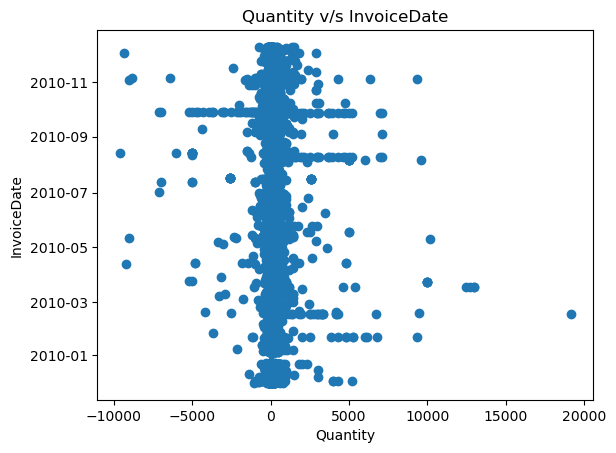

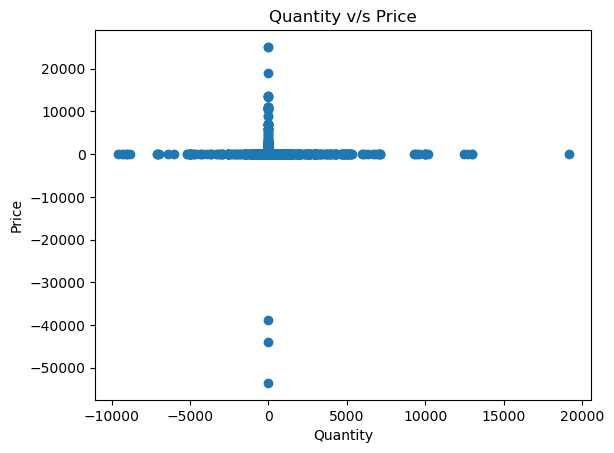

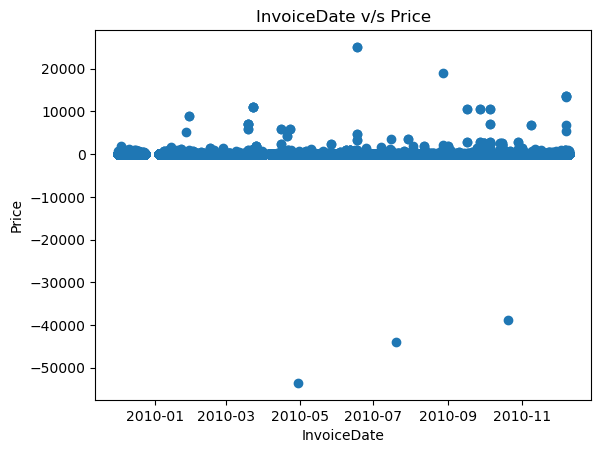

## Correlation:

## Missing Matrix:

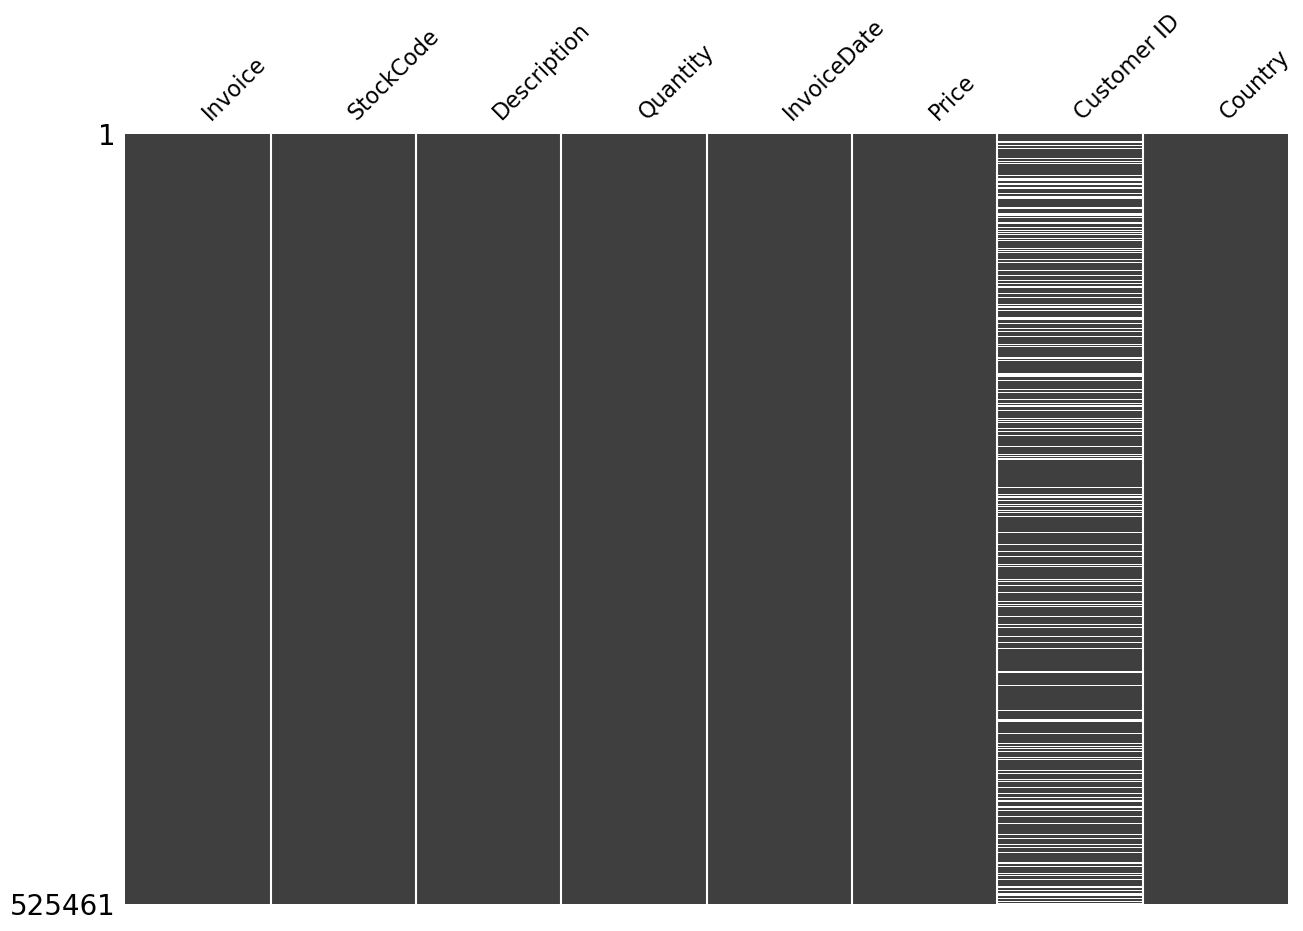

In [67]:
profile_df(df_retail)

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que realice una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

In [66]:
def clean_dataset(df):
    filtered_df = df.copy()
    filtered_df.query('Price > 0\
                       and Price < 30\
                       and Quantity > 0\
                       and Quantity < 100', inplace=True)
    filtered_df.dropna(axis=0, inplace=True)
    return filtered_df
    

In [71]:
filtered_df_retail = clean_dataset(df_retail)
exploratory_data_analysis(filtered_df_retail)

1.- El DataFrame tiene 400137 filas y 8 columnas

2.- El DataFrame esta compuesto por las siguientes columnas:  ['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country'] 

3.- Ejemplos de filas del DataFrame:

Primeras 5 filas:


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom



 Últimas 5 filas:


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom



 Muestreo aleatorio de 5 filas:


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
58469,494652,21257,VICTORIAN SEWING BOX MEDIUM,1,2010-01-17 12:40:00,7.95,14527.0,United Kingdom
492792,535431,84380,SET OF 3 BUTTERFLY COOKIE CUTTERS,12,2010-11-26 12:19:00,1.25,12474.0,Germany
504016,536523,22217,T-LIGHT HOLDER HANGING LACE,12,2010-12-01 12:50:00,1.25,12868.0,United Kingdom
315243,520056,21165,BEWARE OF THE CAT METAL SIGN,12,2010-08-23 15:04:00,1.69,18225.0,United Kingdom
96895,498517,21314,SMALL GLASS HEART TRINKET POT,4,2010-02-19 12:34:00,2.10,15808.0,United Kingdom



 4.- Descripción numérica del Dataframe:



,Quantity,InvoiceDate,Price
count,400137.000000,400137,400137.000000
mean,8.906190,2010-07-01 17:38:09.490249216,2.966039
min,1.000000,2009-12-01 07:45:00,0.001000
25%,2.000000,2010-03-26 15:32:00,1.250000
50%,5.000000,2010-07-11 12:45:00,1.950000
75%,12.000000,2010-10-15 10:24:00,3.750000
max,98.000000,2010-12-09 20:01:00,29.950000
std,12.129429,NaN,2.894664



 5.- Tipo de datos por columna:


Invoice              category
StockCode            category
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID          category
Country                object
dtype: object


 6.- Cantidad de valores nulos por columna:


Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


 7.- Cantidad de valores nulos en total:


0


 8.- Cantidad de valores únicos por columna:


Invoice        18451
StockCode       3972
Description     4397
Quantity          91
InvoiceDate    17351
Price            231
Customer ID     4235
Country           37
dtype: int64

> En este análisis se ha reducido significativamente la cantidad de filas, aproximadamente en 125.000, lo que equivale a aproximadamente un quinto del tamaño original del conjunto de datos. Por medio de esta reducción, los gráficos univariados se asemejarán a los gráficos del análisis anterior sin outliers.

> En la consulta se seleccionaron registros con precios positivos y artículos en la boleta mayores a 0, con el objetivo de evitar artículos con precios negativos y garantizar al menos un artículo por boleta. Para establecer los límites superiores, se tomaron valores arbitrarios teniendo en cuenta los gráficos sin outliers obtenidos en el análisis univariado previo.

### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [68]:
df_TOP = df_retail.groupby("StockCode").agg({'Price':'sum'}).reset_index()
df_TOP = df_TOP.nlargest(30,'Price')
df_TOP['StockCode'] = df_TOP['StockCode'].astype(str)

In [69]:
df_TOP

,StockCode,Price
4615,M,536942.69
4613,DOT,116415.43
4580,AMAZONFEE,79739.16
1608,22423,31386.40
4582,BANK CHARGES,29115.87
4617,POST,22820.22
1108,21843,13590.86
4578,ADJUST,10960.62
4149,85123A,10681.06
1030,21754,9093.20


In [70]:
fig = px.bar(df_TOP, x='StockCode', y='Price')
fig.show()

> Haciendo un análisis de los primeros 5 que generan más ganacias (M, DOT, AMAZONFEE, 22423, y BANK CHARGES), se puede ver que estos prácticamente no coinciden en cuanto a los productos más vendidos (85123A, 22423, 85099B, 21212, y 21232), a excepción del producto 22423, que es el cuarto que reporta más utilidades, y es el segundo más vendido. En el caso de los otros productos, se podría justificar el hecho de que no sean los que aporten con más ganancias por el hecho de que podrían presentar precios más bajos que los artículos que generan más ganancias. Se puede notar en la gráfica de artículos más vendidos que M y DOT, con 850 y 736 ventas respectivamente, no son realmente muy vendidos (a diferencia de las más de 3500 ventas de 85123A), pero probablemente sus precios sean tan altos que aún con estas ventas tan pequeñas, generen grandes ganancias. 

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [72]:
def plot_ventas(dataframe):
    df = dataframe.copy()

    df['InvoiceDate'] = df['InvoiceDate'].dt.date
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    ventas_diarias = df.groupby(df['InvoiceDate'].dt.date).agg({'Quantity': 'sum', 'Invoice': 'nunique'}).reset_index()

    fig = sp.make_subplots(rows=2, cols=1, shared_xaxes=True)

    fig.add_trace(go.Scatter(x=ventas_diarias['InvoiceDate'], y=ventas_diarias['Quantity'], name='Ventas Diarias (quantity)'), row=1, col=1)
    fig.update_yaxes(title_text='Ventas', row=1, col=1)

    fig.add_trace(go.Scatter(x=ventas_diarias['InvoiceDate'], y=ventas_diarias['Invoice'], name='Cantidad de Facturas (Invoice)'), row=2, col=1)
    fig.update_yaxes(title_text='Cantidad de Facturas', row=2, col=1)

    fig.update_layout(height=600, width=1000, title_text='Ventas Diarias y Cantidad de Facturas')

    fig.show()

In [73]:
plot_ventas(filtered_df_retail)

> Al analizar detenidamente ambos gráficos, podemos observar un patrón temporal bastante similar en su comportamiento. Es importante destacar que no se registran datos extremadamente alejados del resto, lo cual se debe a que han sido previamente filtrados. Resulta interesante notar que la tendencia de ventas muestra un incremento progresivo a medida que el año avanza, alcanzando su punto máximo el 25 de noviembre. Asimismo, llama la atención que en ambos gráficos se evidencia una ausencia de datos durante los primeros días de enero, lo cual podría atribuirse a la celebración del Año Nuevo. 

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>